In [16]:
import pandas as pd

In [17]:
data=pd.read_csv("googleplaystore.csv")

In [18]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Understanding the dataset

Veri kümesini anlama

In [20]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
#Let's replace the space in the column names with an underscore.
#Sütun adlarındaki boşluğu alt çizgi ile değiştirelim.

In [22]:
data.columns = data.columns.str.replace(" ","_")

In [23]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [24]:
#Let's look at the number of rows and columns in the dataset.
#Veri kümesindeki satır ve sütun sayısına bakalım.

In [25]:
data.shape

(10841, 13)

In [26]:
#Let me show the types of columns.
#Sütun türlerini göstereyim.

In [27]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

Handling missing data

Eksik verileri işleme

In [29]:
#Let's have a look at missing data in columns.
#Sütunlardaki eksik verilere bir göz atalım.

In [30]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [31]:
#To visualize missing data, let me use seaborn.
#Eksik verileri görmek için ısı haritası yöntemini kullanacağım.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_theme()
sns.set(rc={"figure.dpi":300,"figure.figsize":(12,9)})

In [34]:
#To see missing data, I'm going to use the heatmap method.
#Eksik verileri görmek için ısı haritası yöntemini kullanacağım.

<AxesSubplot:>

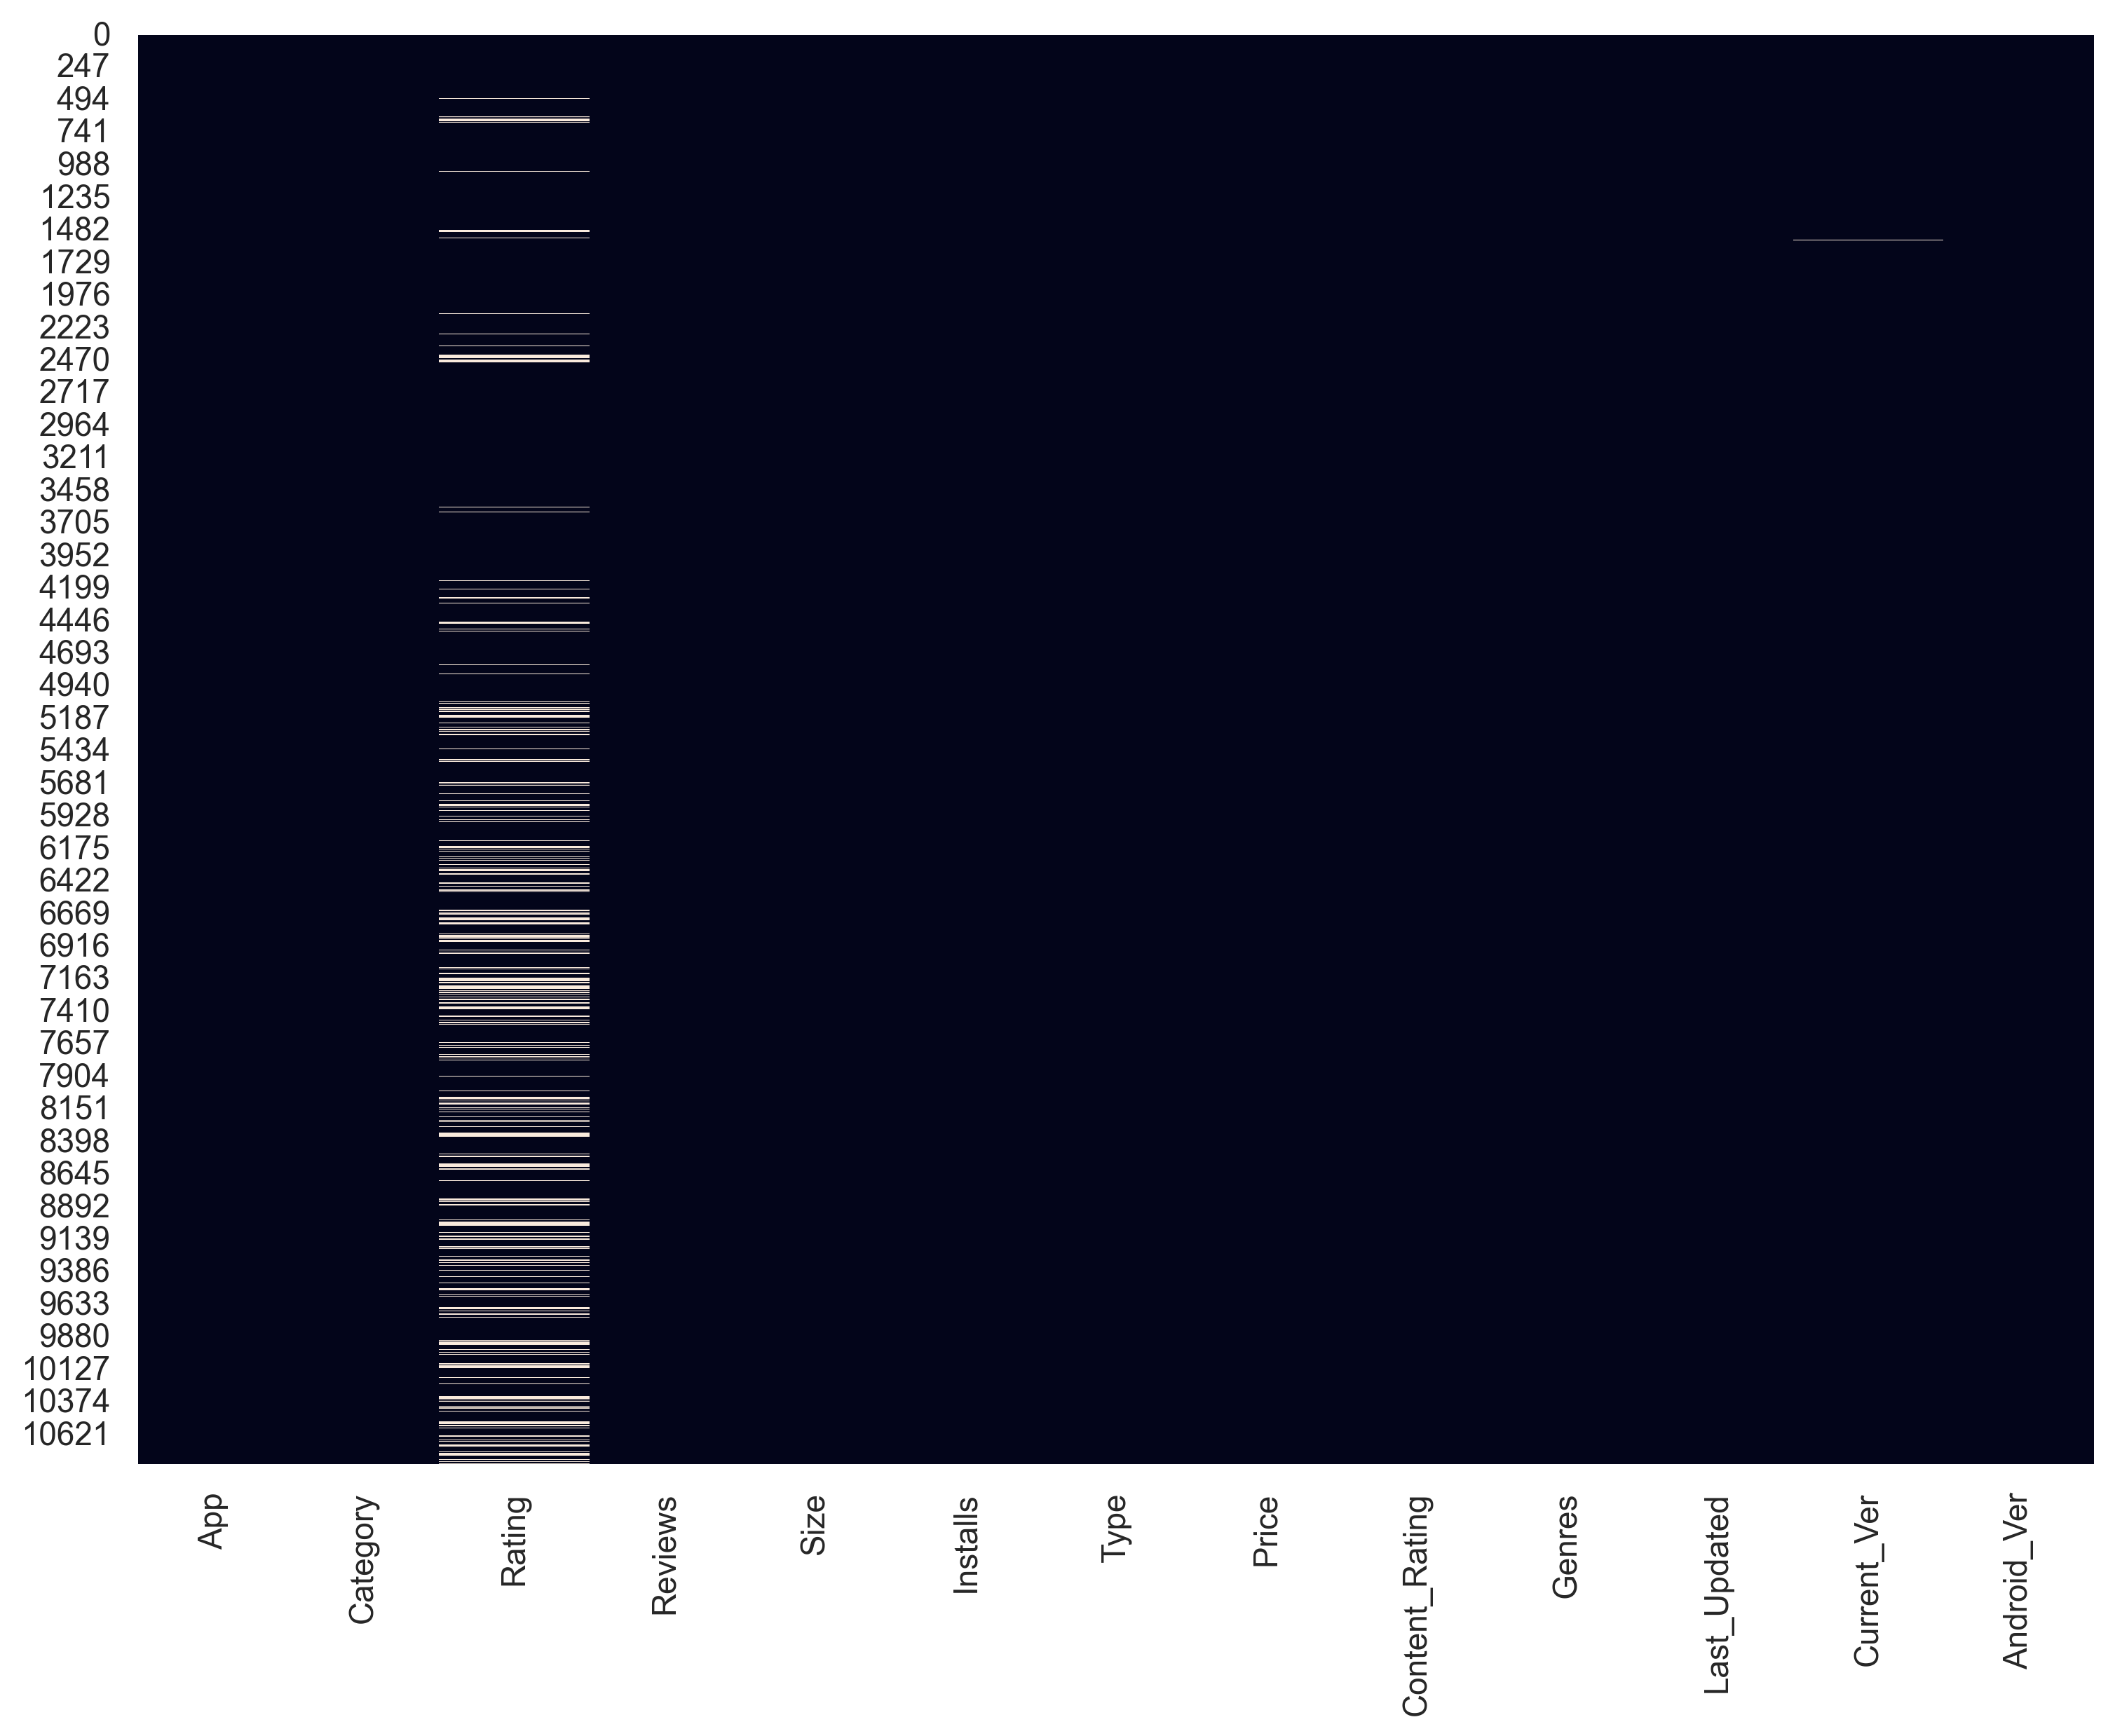

In [36]:
sns.heatmap(data.isnull(),cbar=False)

In [37]:
#I'm going to use the median value for missing data in the rating column. Note that the median is more robust than the mean for the outlier values.
#Derecelendirme sütunundaki eksik veriler için ortanca değeri kullanacağım. Medyanın, aykırı değerlerin ortalamasından daha sağlam olduğuna dikkat edin.

In [38]:
rating_median=data["Rating"].median()
print(rating_median)
data["Rating"].fillna(rating_median,inplace=True)

4.3


In [39]:
#Let's remove the other missing data as it is very little.
#Çok az olduğu için diğer eksik verileri kaldıralım.

In [40]:
data.dropna(inplace=True)

In [41]:
#Let's take a look at missing data again.
#Kayıp verilere tekrar bir göz atalım.

In [42]:
data.isnull().sum().sum()

0

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Data preprocessing

Veri ön işleme



In [44]:
#Handling the review column
#İnceleme sütununu işleme

In [45]:
#Let's convert the type of reviews into numeric.
#İnceleme türlerini sayısala çevirelim.

In [47]:
data["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [48]:
data["Reviews"]=data["Reviews"].astype("int64")

In [49]:
data["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [50]:
#Handling the size column
#Boyut sütununu işleme

In [51]:
print(len(data["Size"].unique()))
data["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [52]:
#Let's remove the M and k in the size column.
#Boyut sütunundaki M ve k'yi kaldıralım.

In [53]:
data["Size"].replace("M","",regex=True, inplace=True)
data["Size"].replace("k","",regex=True, inplace=True)

In [54]:
data["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [55]:
#Let's replace the string "Depends on device" with the median of the size column. To do this, I will first calculate the median of the size.
#"Cihaza bağlı" dizesini boyut sütununun medyanı ile değiştirelim. Bunu yapmak için önce boyutun medyanını hesaplayacağım.

In [56]:
size_median=data[data["Size"]!="Varies with device"]["Size"].astype(float).median()

In [57]:
size_median

15.0

In [58]:
data["Size"].replace("Varies with device",size_median,inplace=True)

In [59]:
#Let's convert this column into numeric.
#Bu sütunu sayısala çevirelim.

In [60]:
data.Size==pd.to_numeric(data.Size)

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Name: Size, Length: 10829, dtype: bool

In [61]:
data.Size.head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

In [63]:
data.Size.describe().round()

count     10829.0
unique      419.0
top          15.0
freq       1694.0
Name: Size, dtype: float64

In [64]:
#Handling the installs column
#Yüklemeler sütununu işleme

In [65]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [66]:
#Let's remove the + symbol in this column.
#Bu sütundaki + sembolünü kaldıralım.

In [68]:
data.Installs = data.Installs.apply(lambda x:x.replace("+",""))
data.Installs = data.Installs.apply(lambda x:x.replace(",",""))
data.Installs = data.Installs.apply(lambda x:int(x))

In [69]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [70]:
#Handling the price column
#Fiyat sütununun işlenmesi

In [71]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [72]:
#Let's remove the $ symbol in this column.
#Bu sütundaki $ sembolünü kaldıralım.

In [73]:
data.Price=data.Price.apply(lambda x:x.replace("$",""))
data.Price=data.Price.apply(lambda x:float(x))

In [74]:
data["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [75]:
#Handling the genres column
#Türler sütununu işleme

In [76]:
data["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

In [77]:
#The data is divided between genre and subgenre, let's only set by genre.
#Veriler tür ve alt tür arasında bölünmüştür, sadece türe göre ayarlayalım.

In [78]:
data["Genres"]=data["Genres"].str.split(";").str[0]

In [79]:
len(data["Genres"].unique())

48

In [80]:
data["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [82]:
data["Genres"].value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [83]:
#Let's combine the music & audio with the music.
#Müziği ve sesi müzikle birleştirelim.

In [84]:
data["Genres"].replace("Music & Audio","Music",inplace=True)

In [85]:
#Handling the last updated column
#Son güncellenen sütunu işleme

In [86]:
data["Last_Updated"]=pd.to_datetime(data["Last_Updated"])

In [87]:
#Let's take a look at the dataset after EDA
#EDA sonrası veri setine bir göz atalım

In [88]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [89]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

Data visualization

Veri Görselleştirme

In [90]:
#Bar plot for the type column
#Tip sütunu için çubuk grafiği

Text(0.5, 1.0, 'Free & Paid')

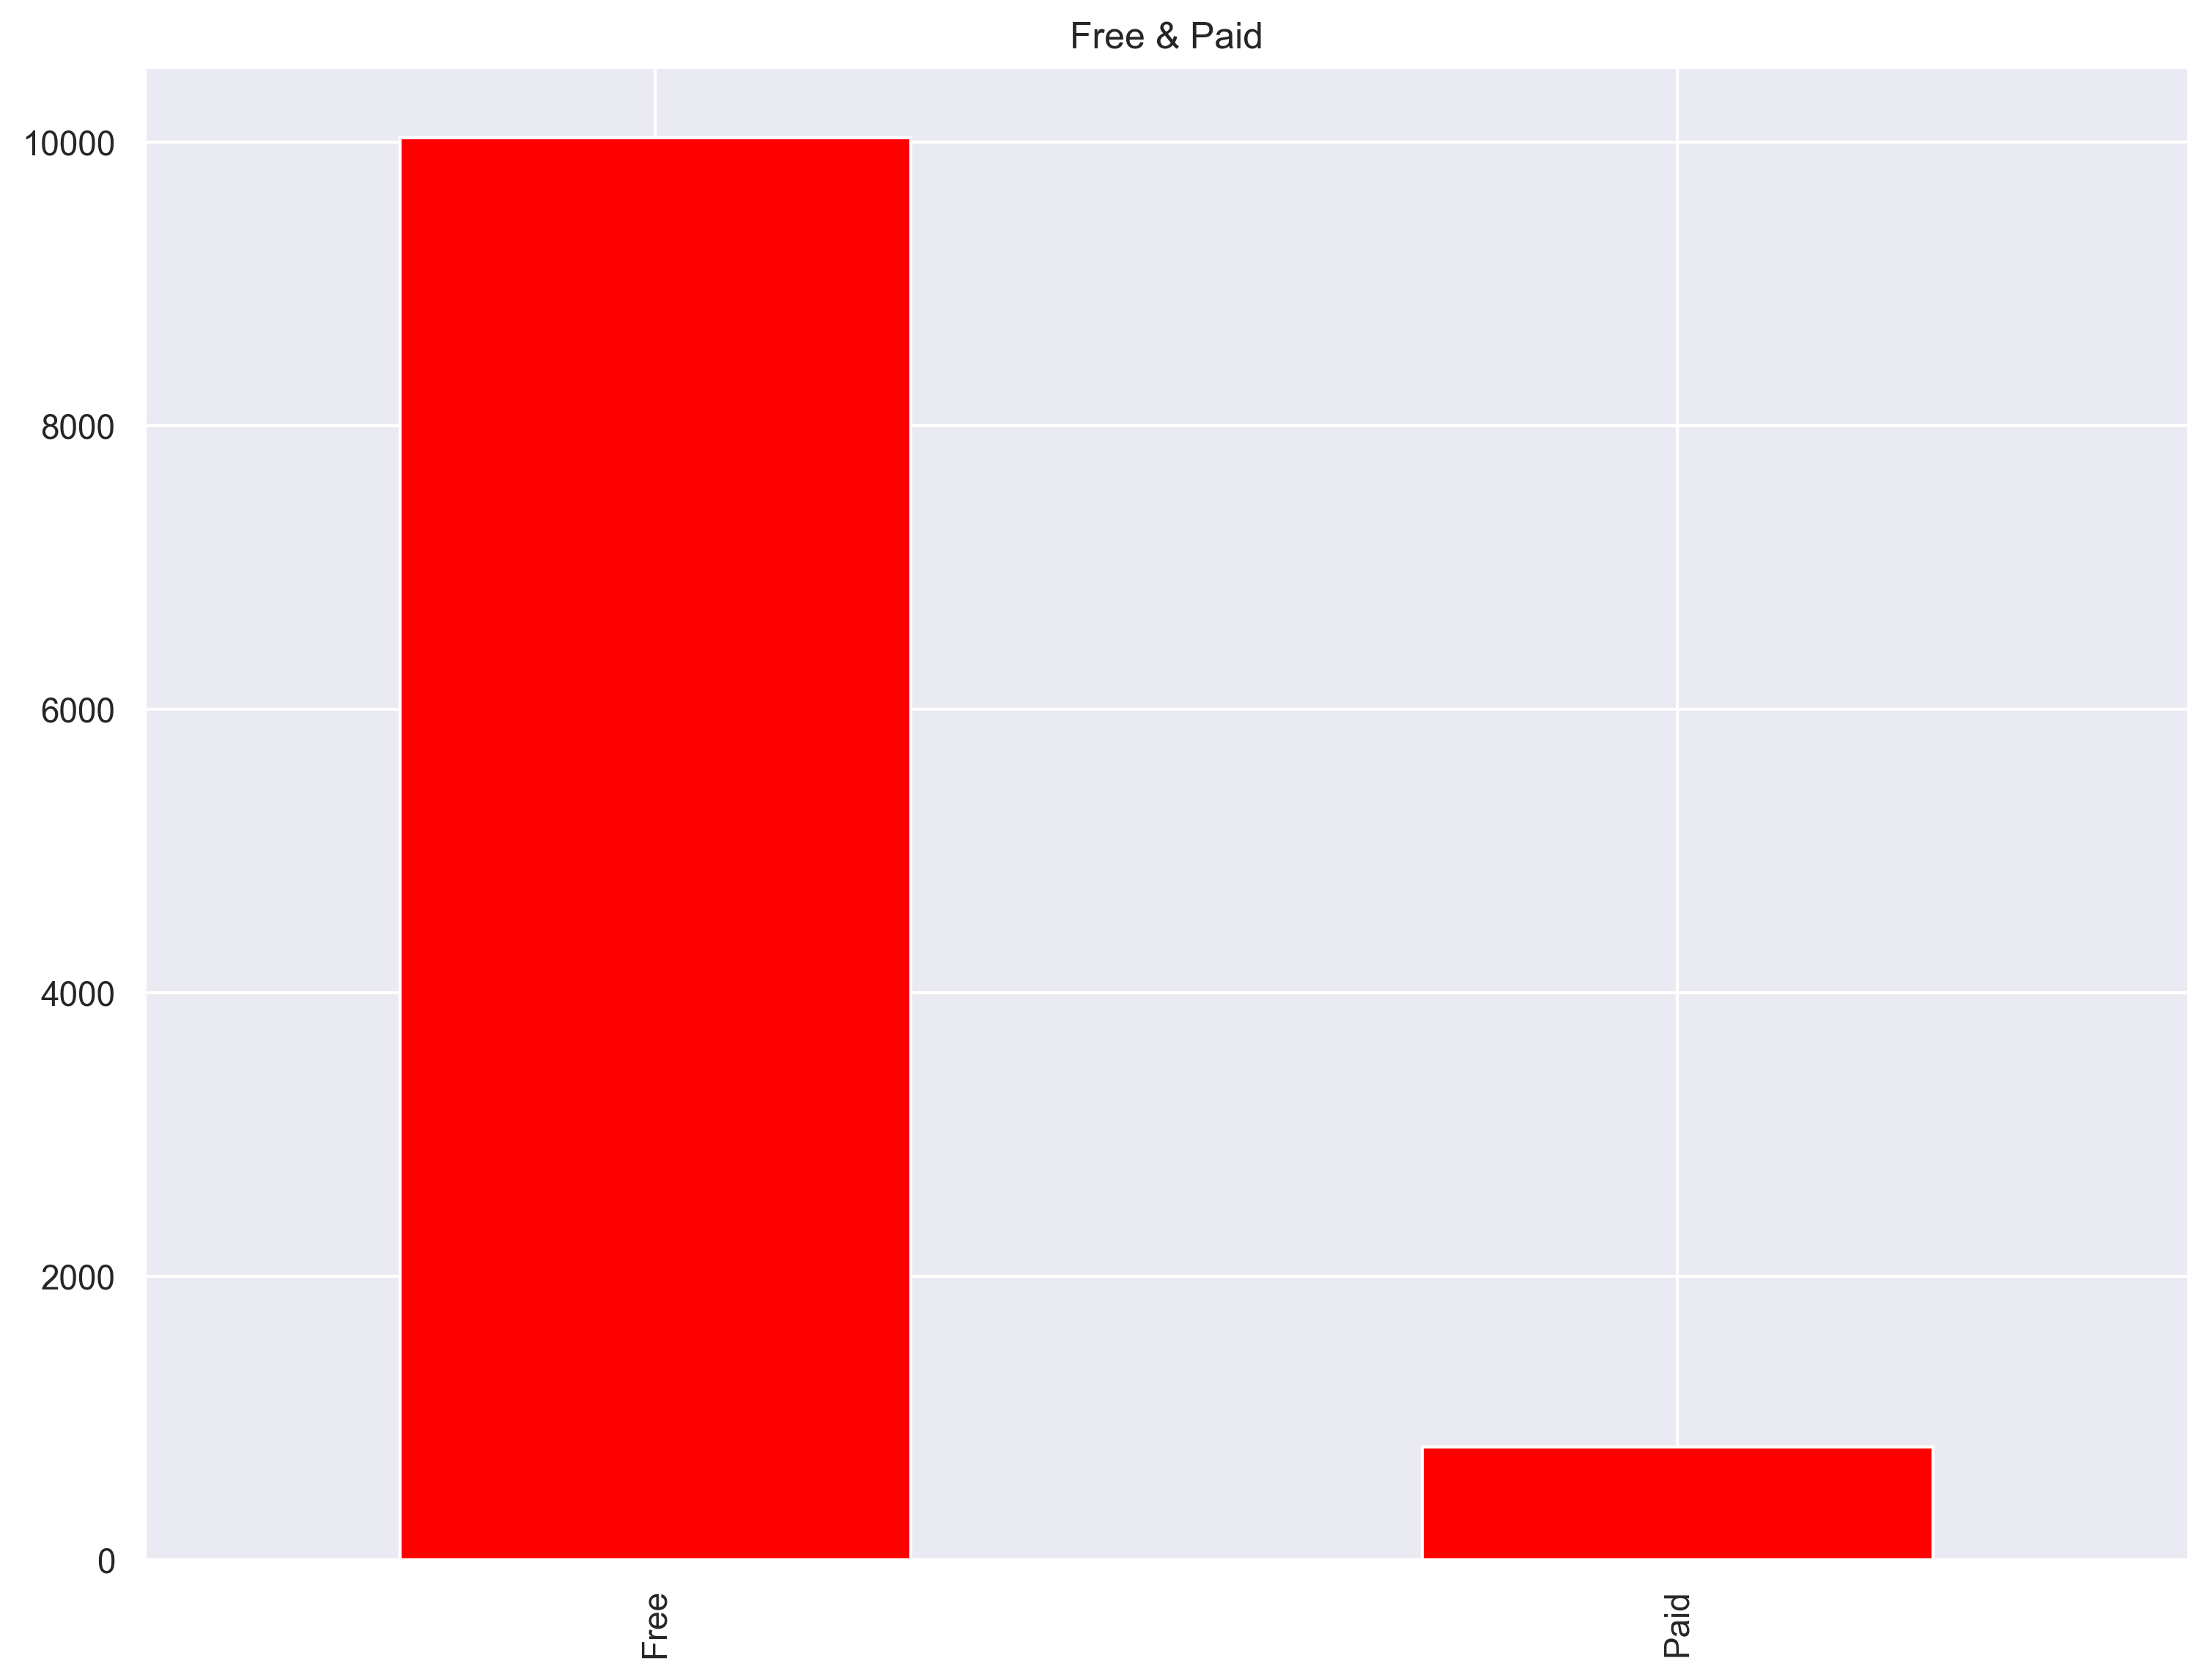

In [92]:
data["Type"].value_counts().plot(kind="bar",color="red")
plt.title("Free & Paid")

In [93]:
#Free apps are more than Paid apps.
#Ücretsiz uygulamalar, Ücretli uygulamalardan daha fazlasıdır.

In [94]:
#Box plot for the rating column
#Derecelendirme sütunu için kutu grafiği

Text(0.5, 1.0, 'Content rating with their counts')

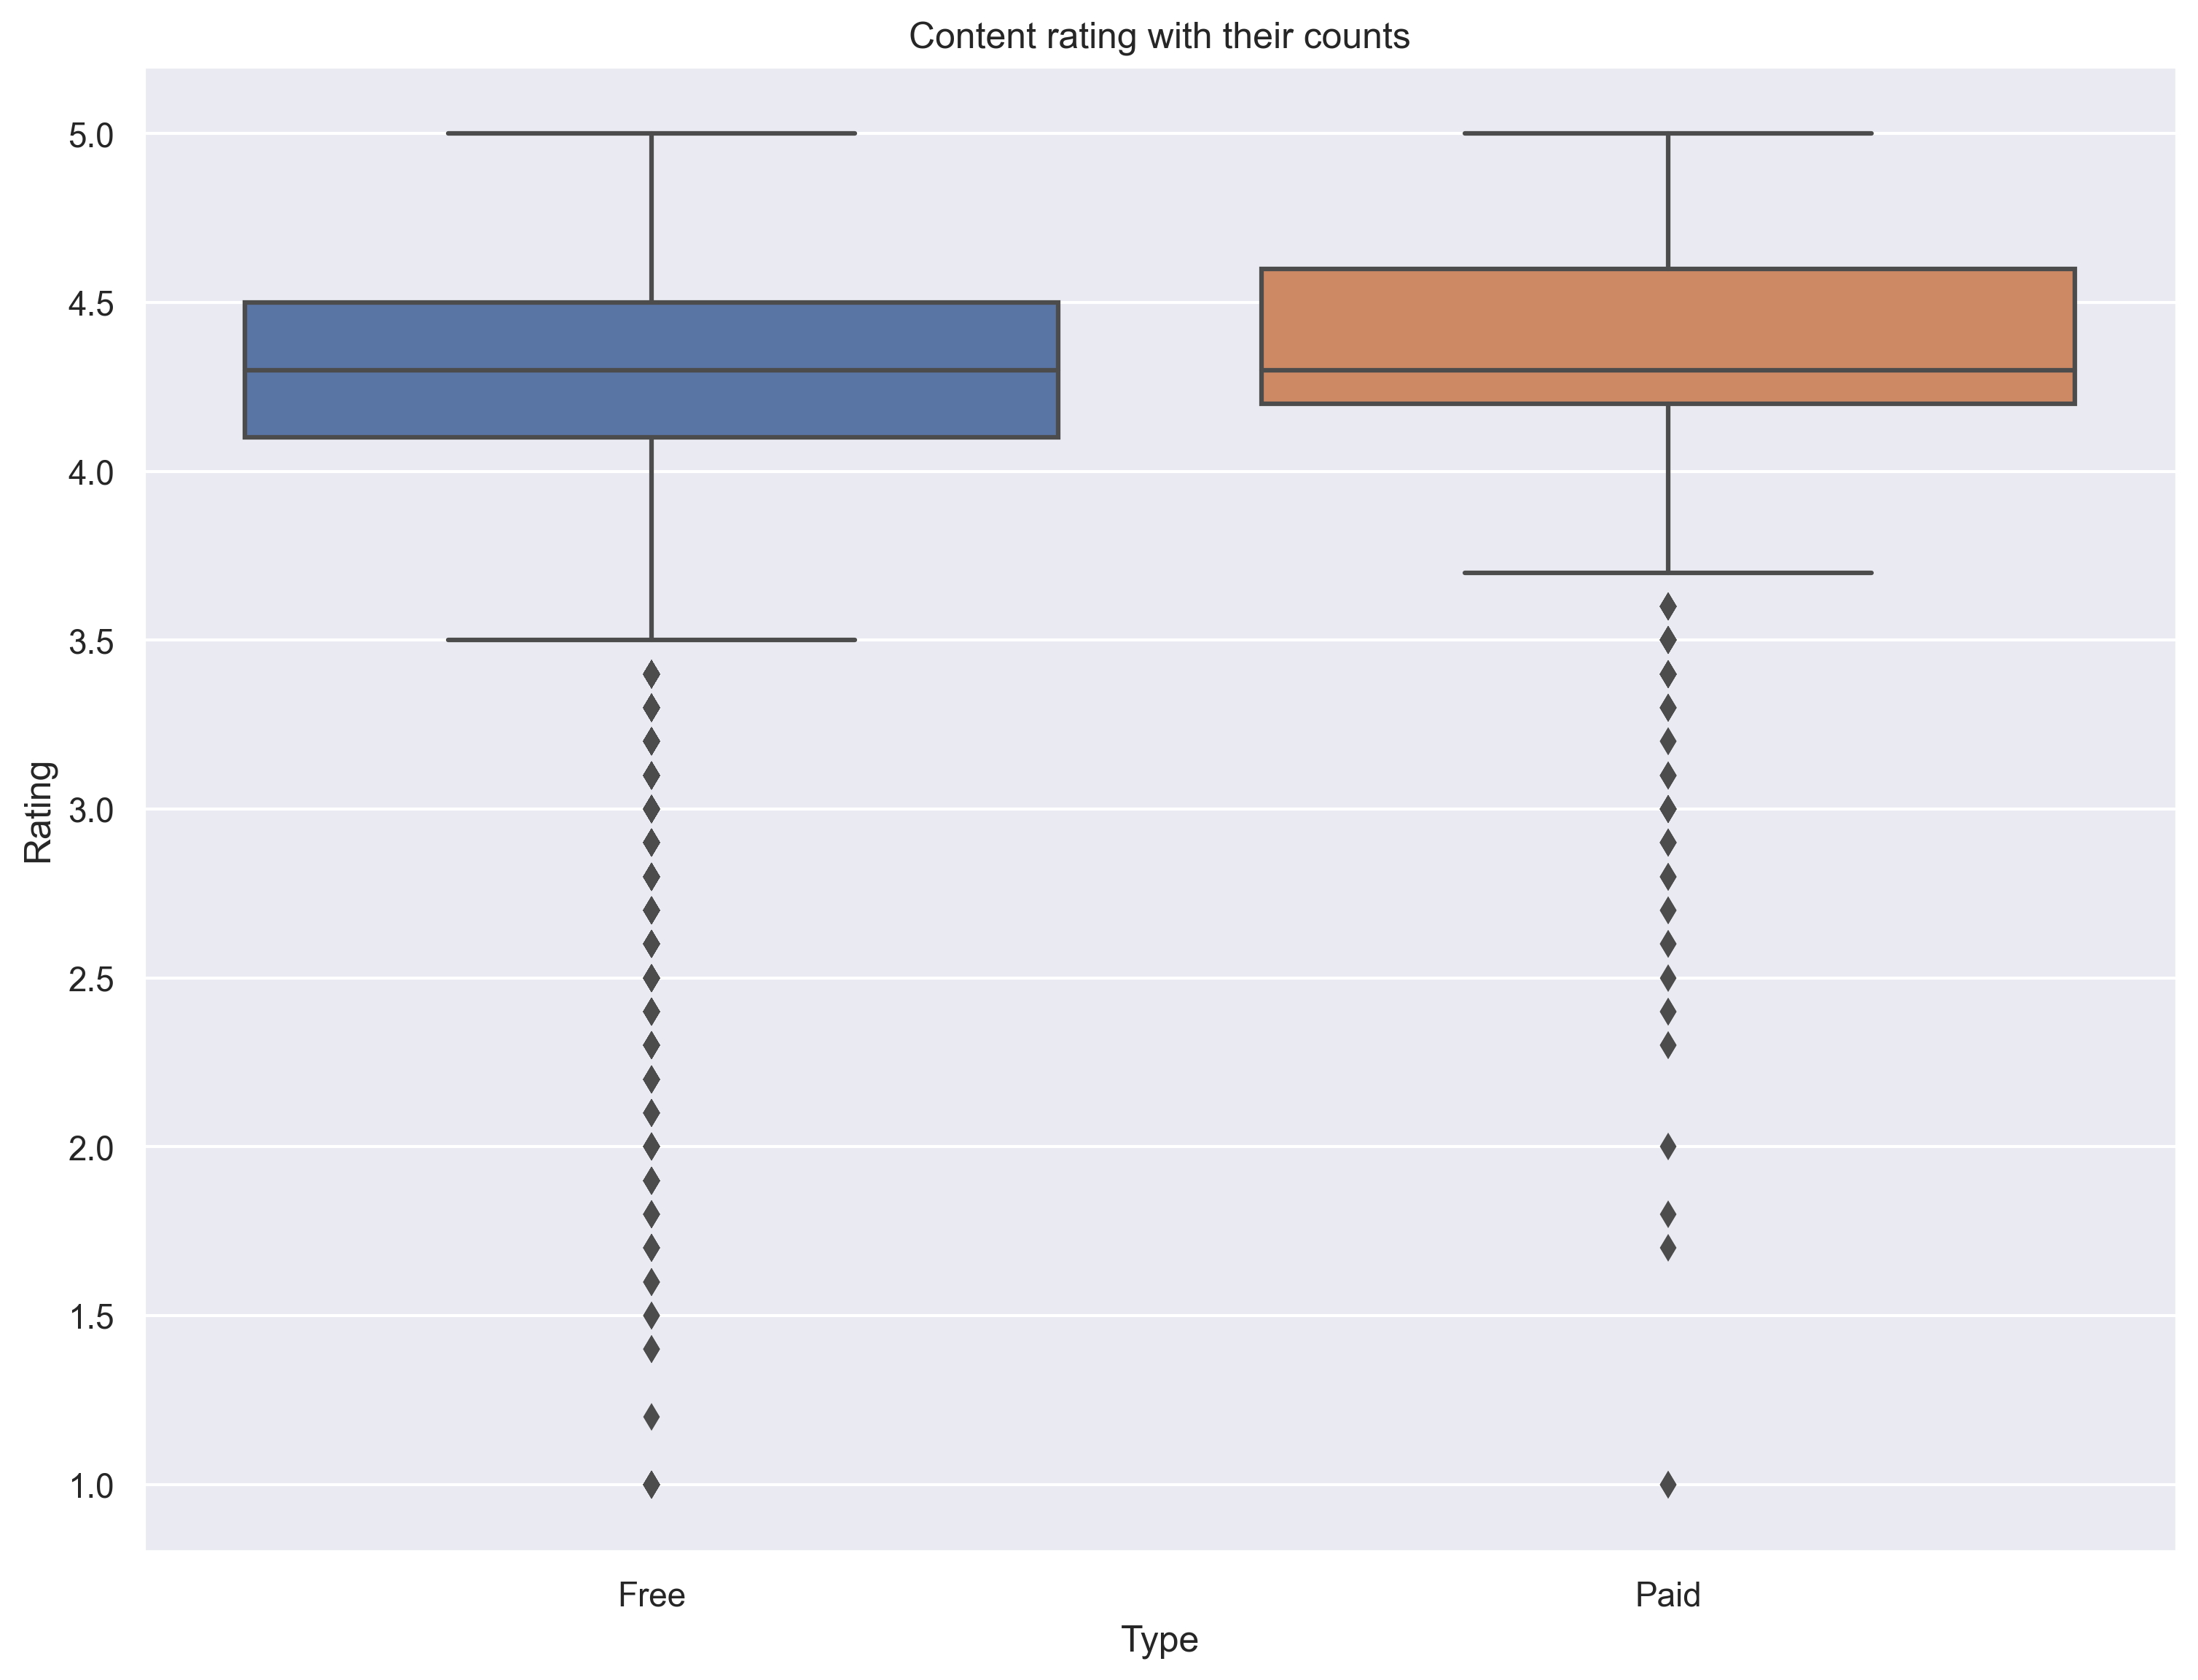

In [95]:
sns.boxplot(x="Type",y="Rating",data=data)
plt.title("Content rating with their counts")

In [96]:
#The average rating of paid apps is higher.
#Ücretli uygulamaların ortalama puanı daha yüksektir.

In [97]:
#Bar plot for the rating column with the number of the categories
#Kategori sayısı ile derecelendirme sütunu için çubuk grafiği

Text(0.5, 1.0, 'Content rating with their counts')

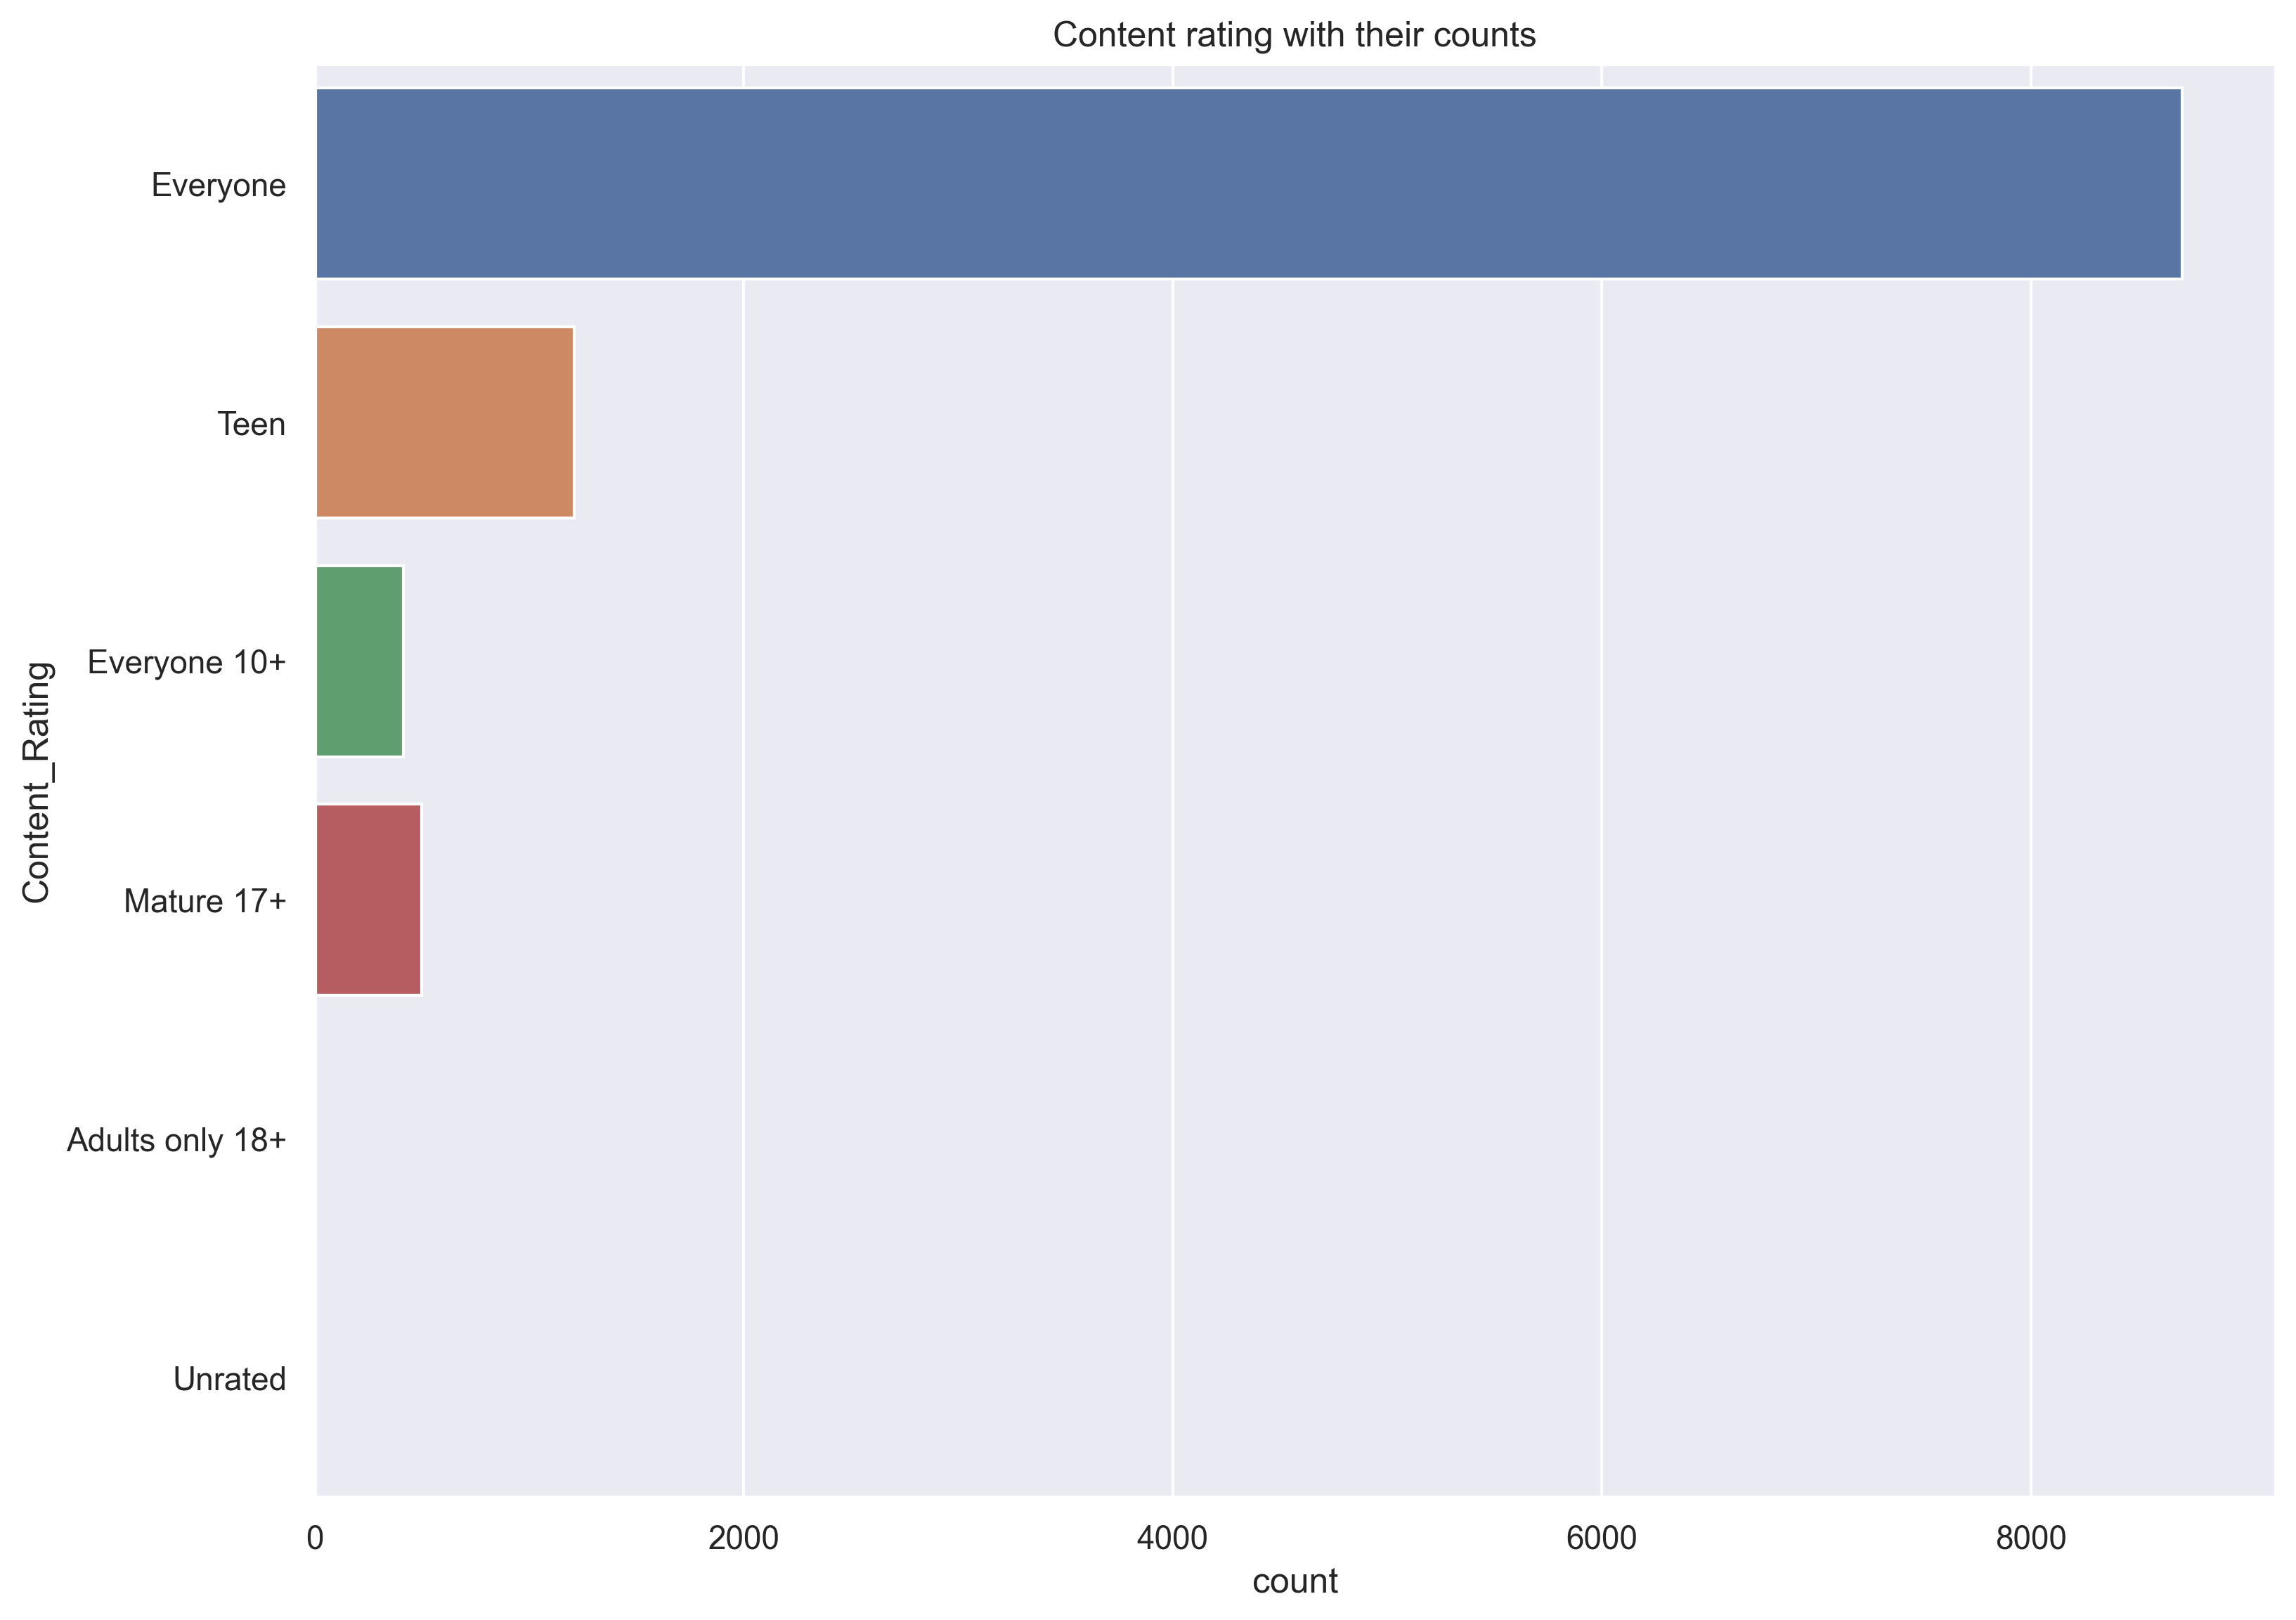

In [98]:
sns.countplot(y="Content_Rating",data=data)
plt.title("Content rating with their counts")

In [99]:
#As you can see, the most apps are in the Everyone category, then comes Teen.
#Gördüğünüz gibi, çoğu uygulama Herkes kategorisinde, ardından Genç geliyor.

In [100]:
#Box plot for the content rating and rating
#İçerik derecelendirmesi ve derecelendirmesi için kutu grafiği

Text(0.5, 1.0, 'The number of categories')

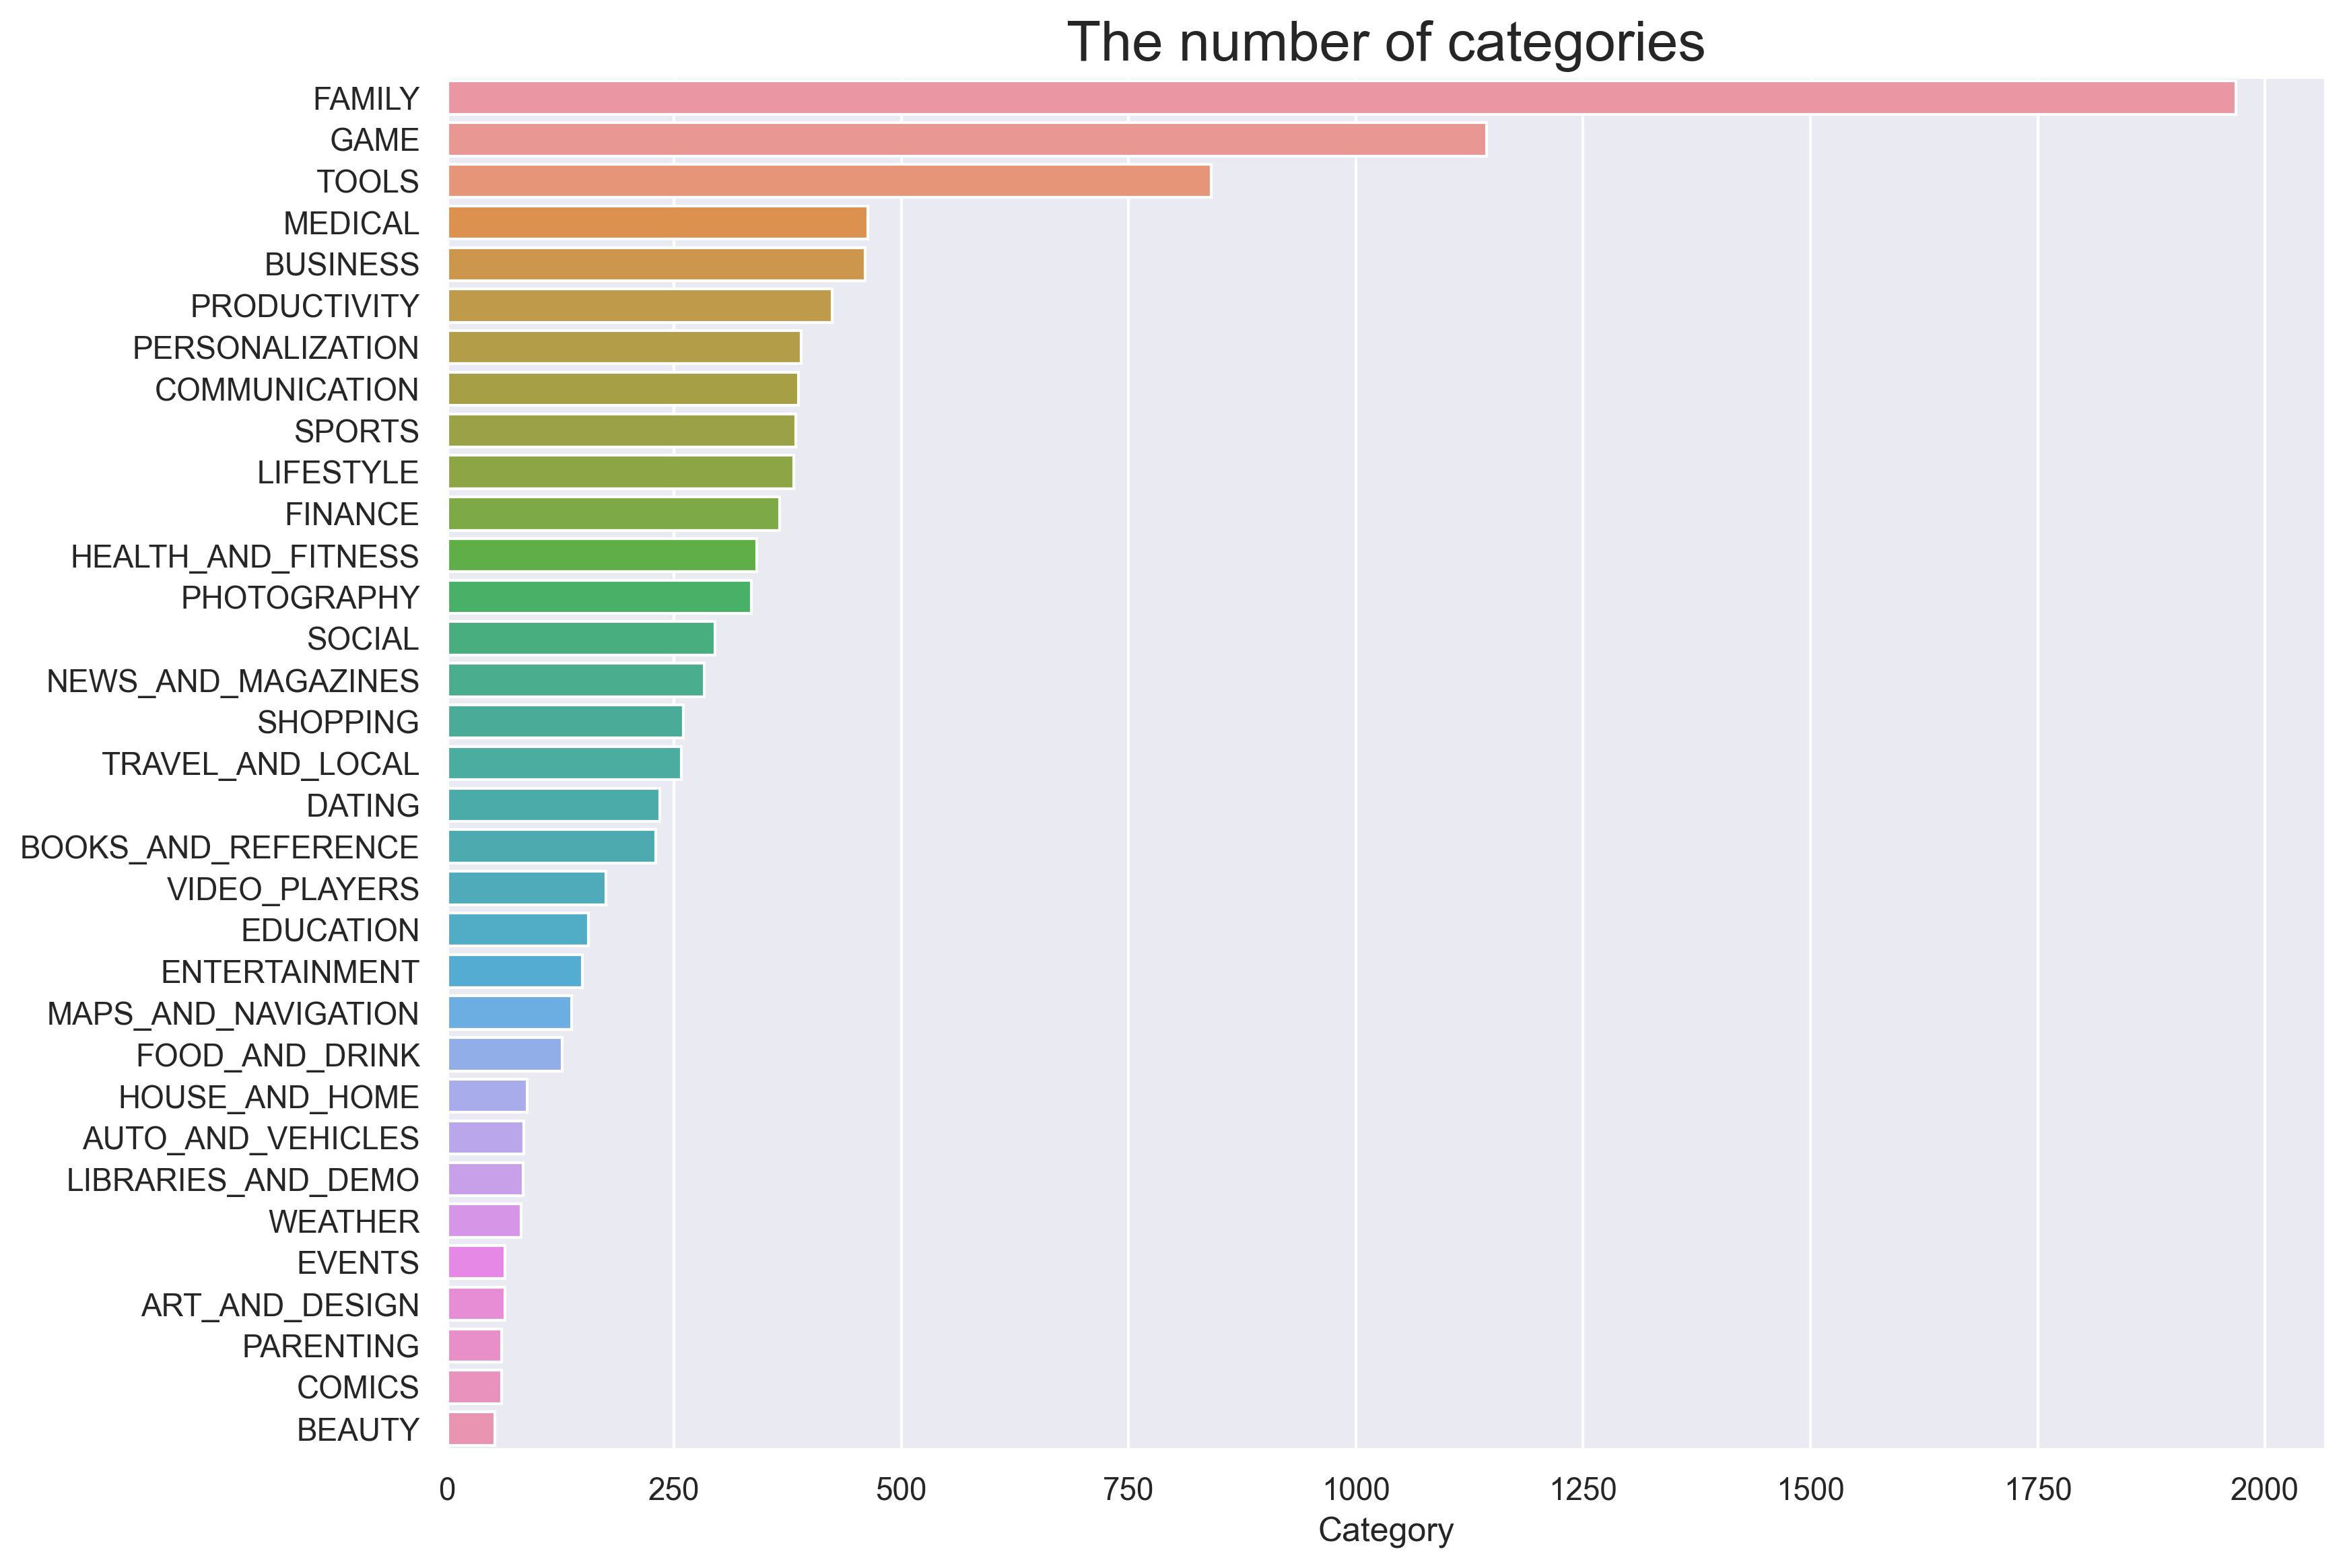

In [101]:
cat_num=data["Category"].value_counts()
sns.barplot(x=cat_num,y=cat_num.index,data=data)
plt.title("The number of categories",size=20)

In [102]:
#The most applications are in the family category, then the game, then tools.
#Çoğu uygulama aile kategorisinde, ardından oyun, ardından araçlardır.

In [103]:
#Scatter plot for the category and price
#Kategori ve fiyat için dağılım grafiği

Text(0.5, 1.0, 'Category & Price')

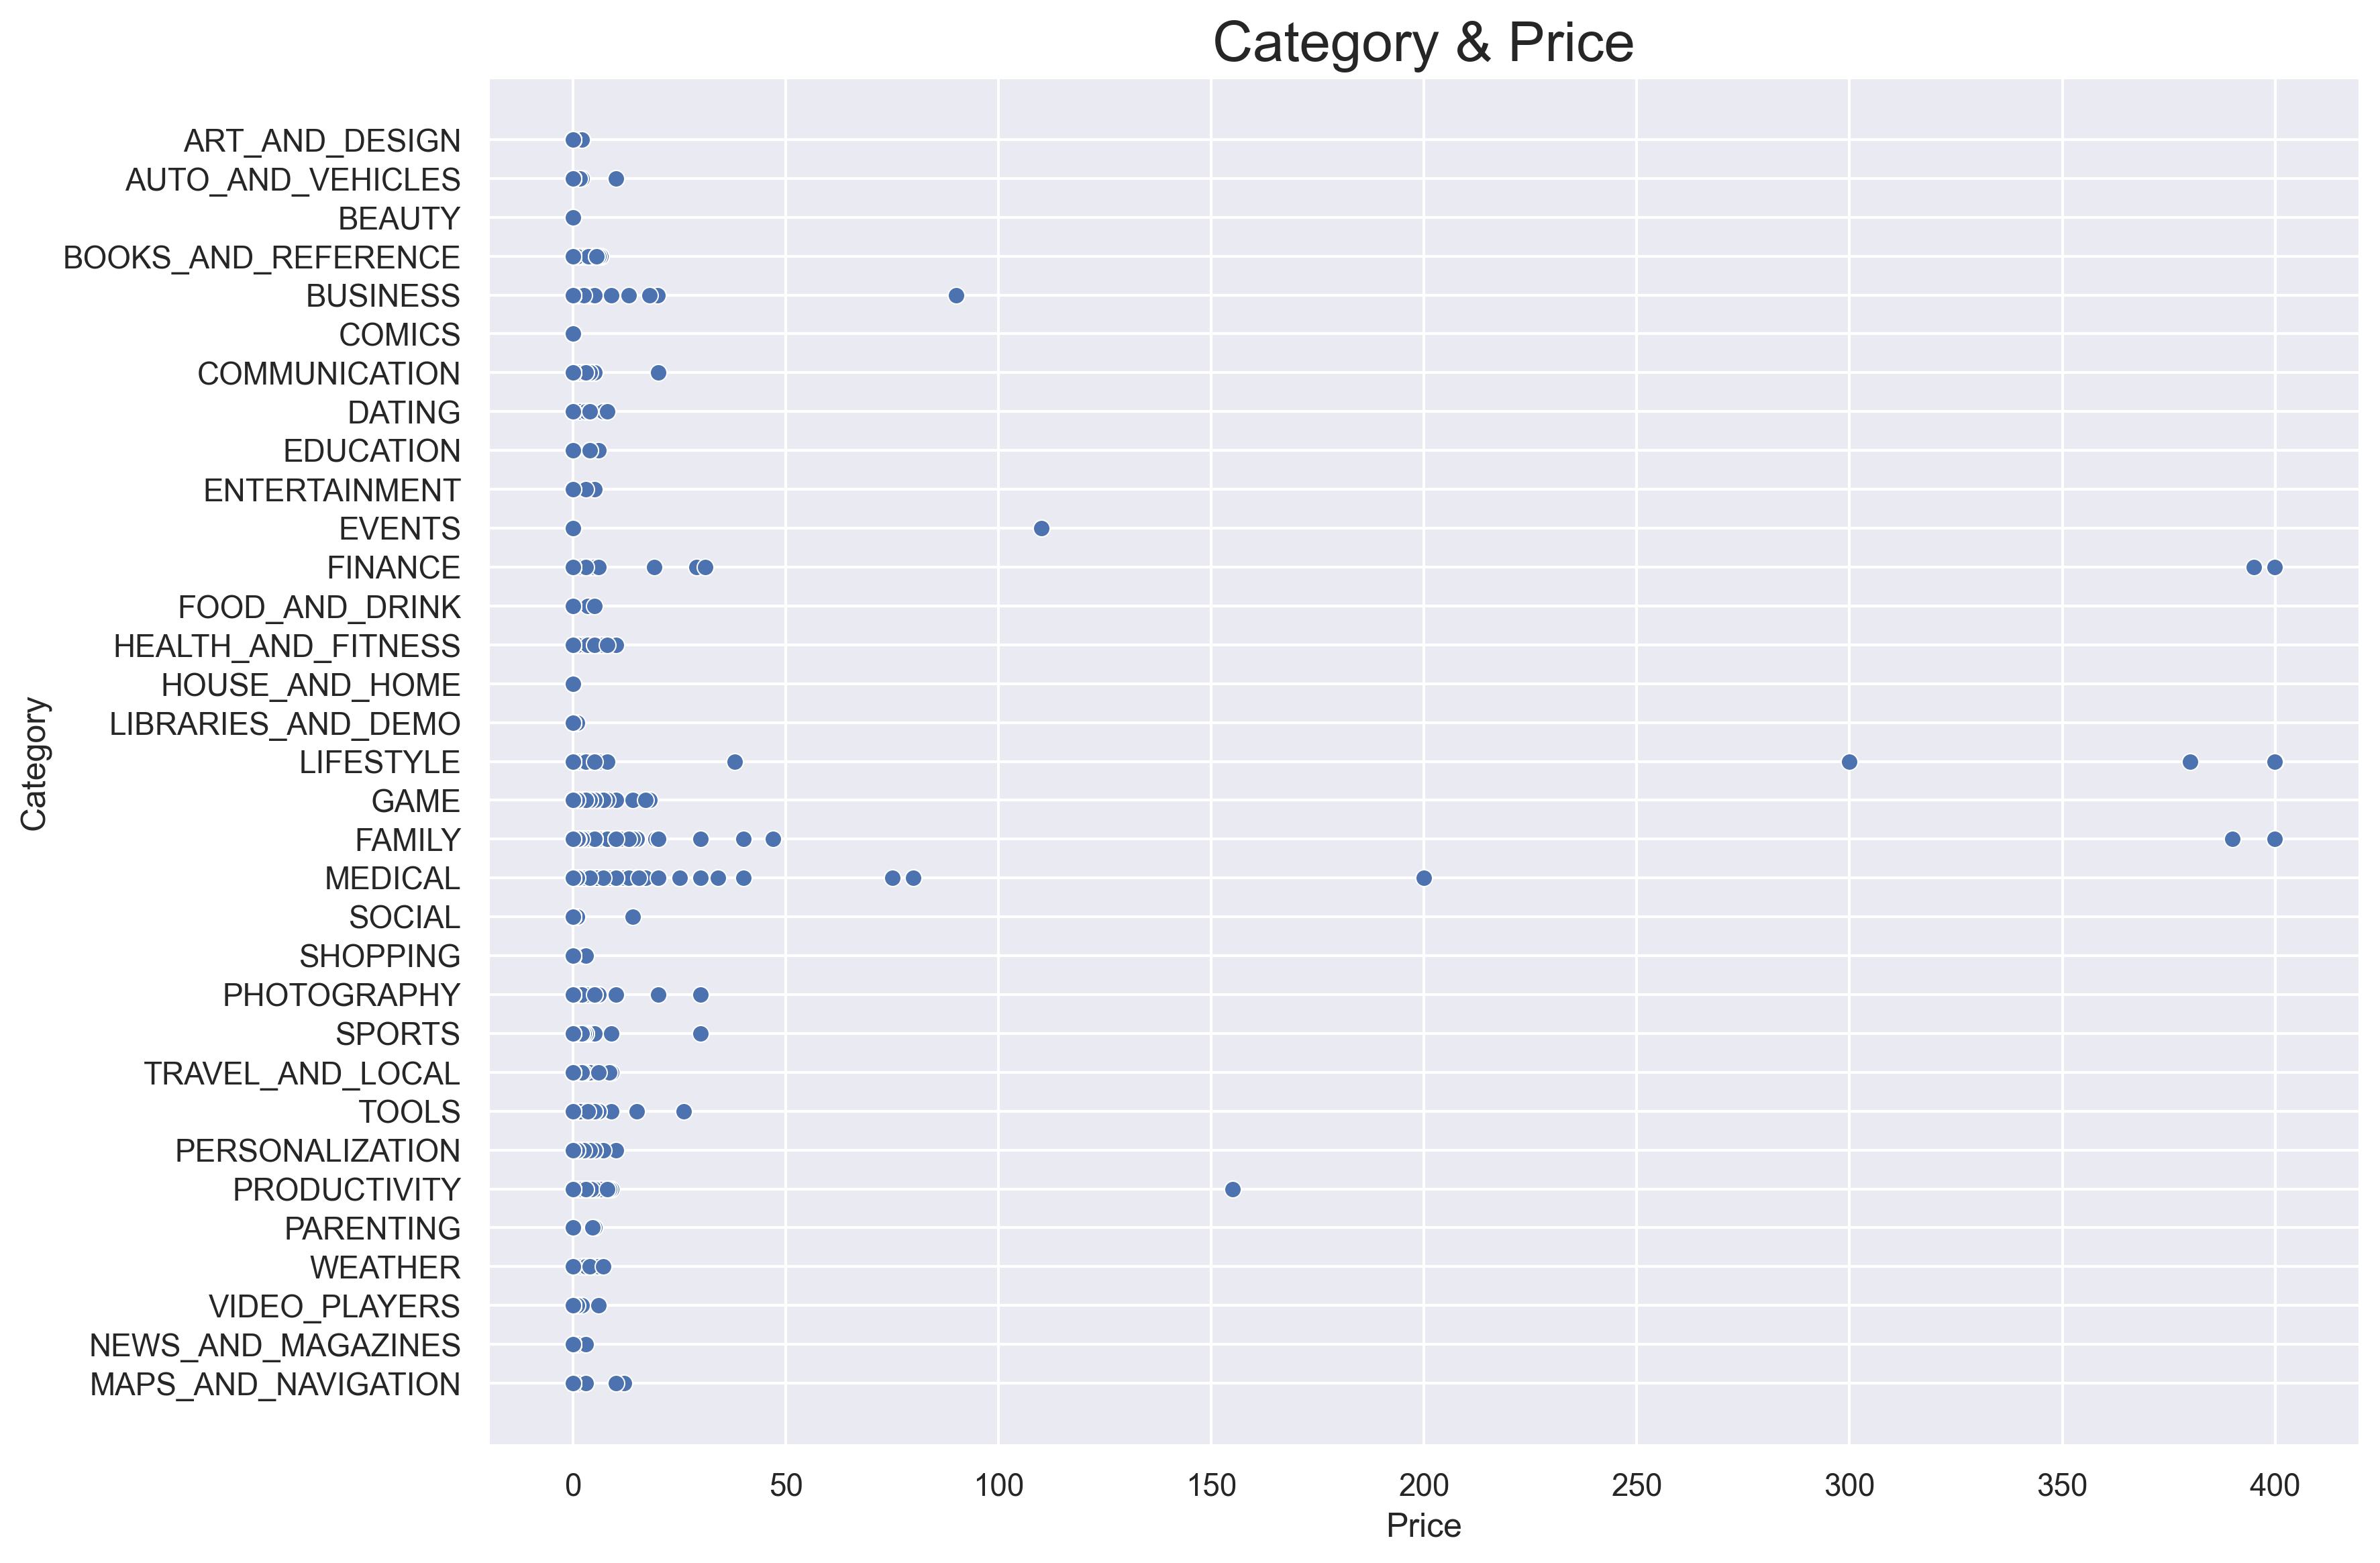

In [104]:
sns.scatterplot(data=data,y="Category",x="Price")
plt.title("Category & Price",size=20)

In [105]:
#Notice that the highest paid applications are finance, lifestyle, and family.
#En yüksek ücretli uygulamaların finans, yaşam tarzı ve aile olduğuna dikkat edin.

In [106]:
#Heatmap for numerical columns
#Sayısal sütunlar için ısı haritası

Text(0.5, 1.0, 'Heatmap for numerical columns')

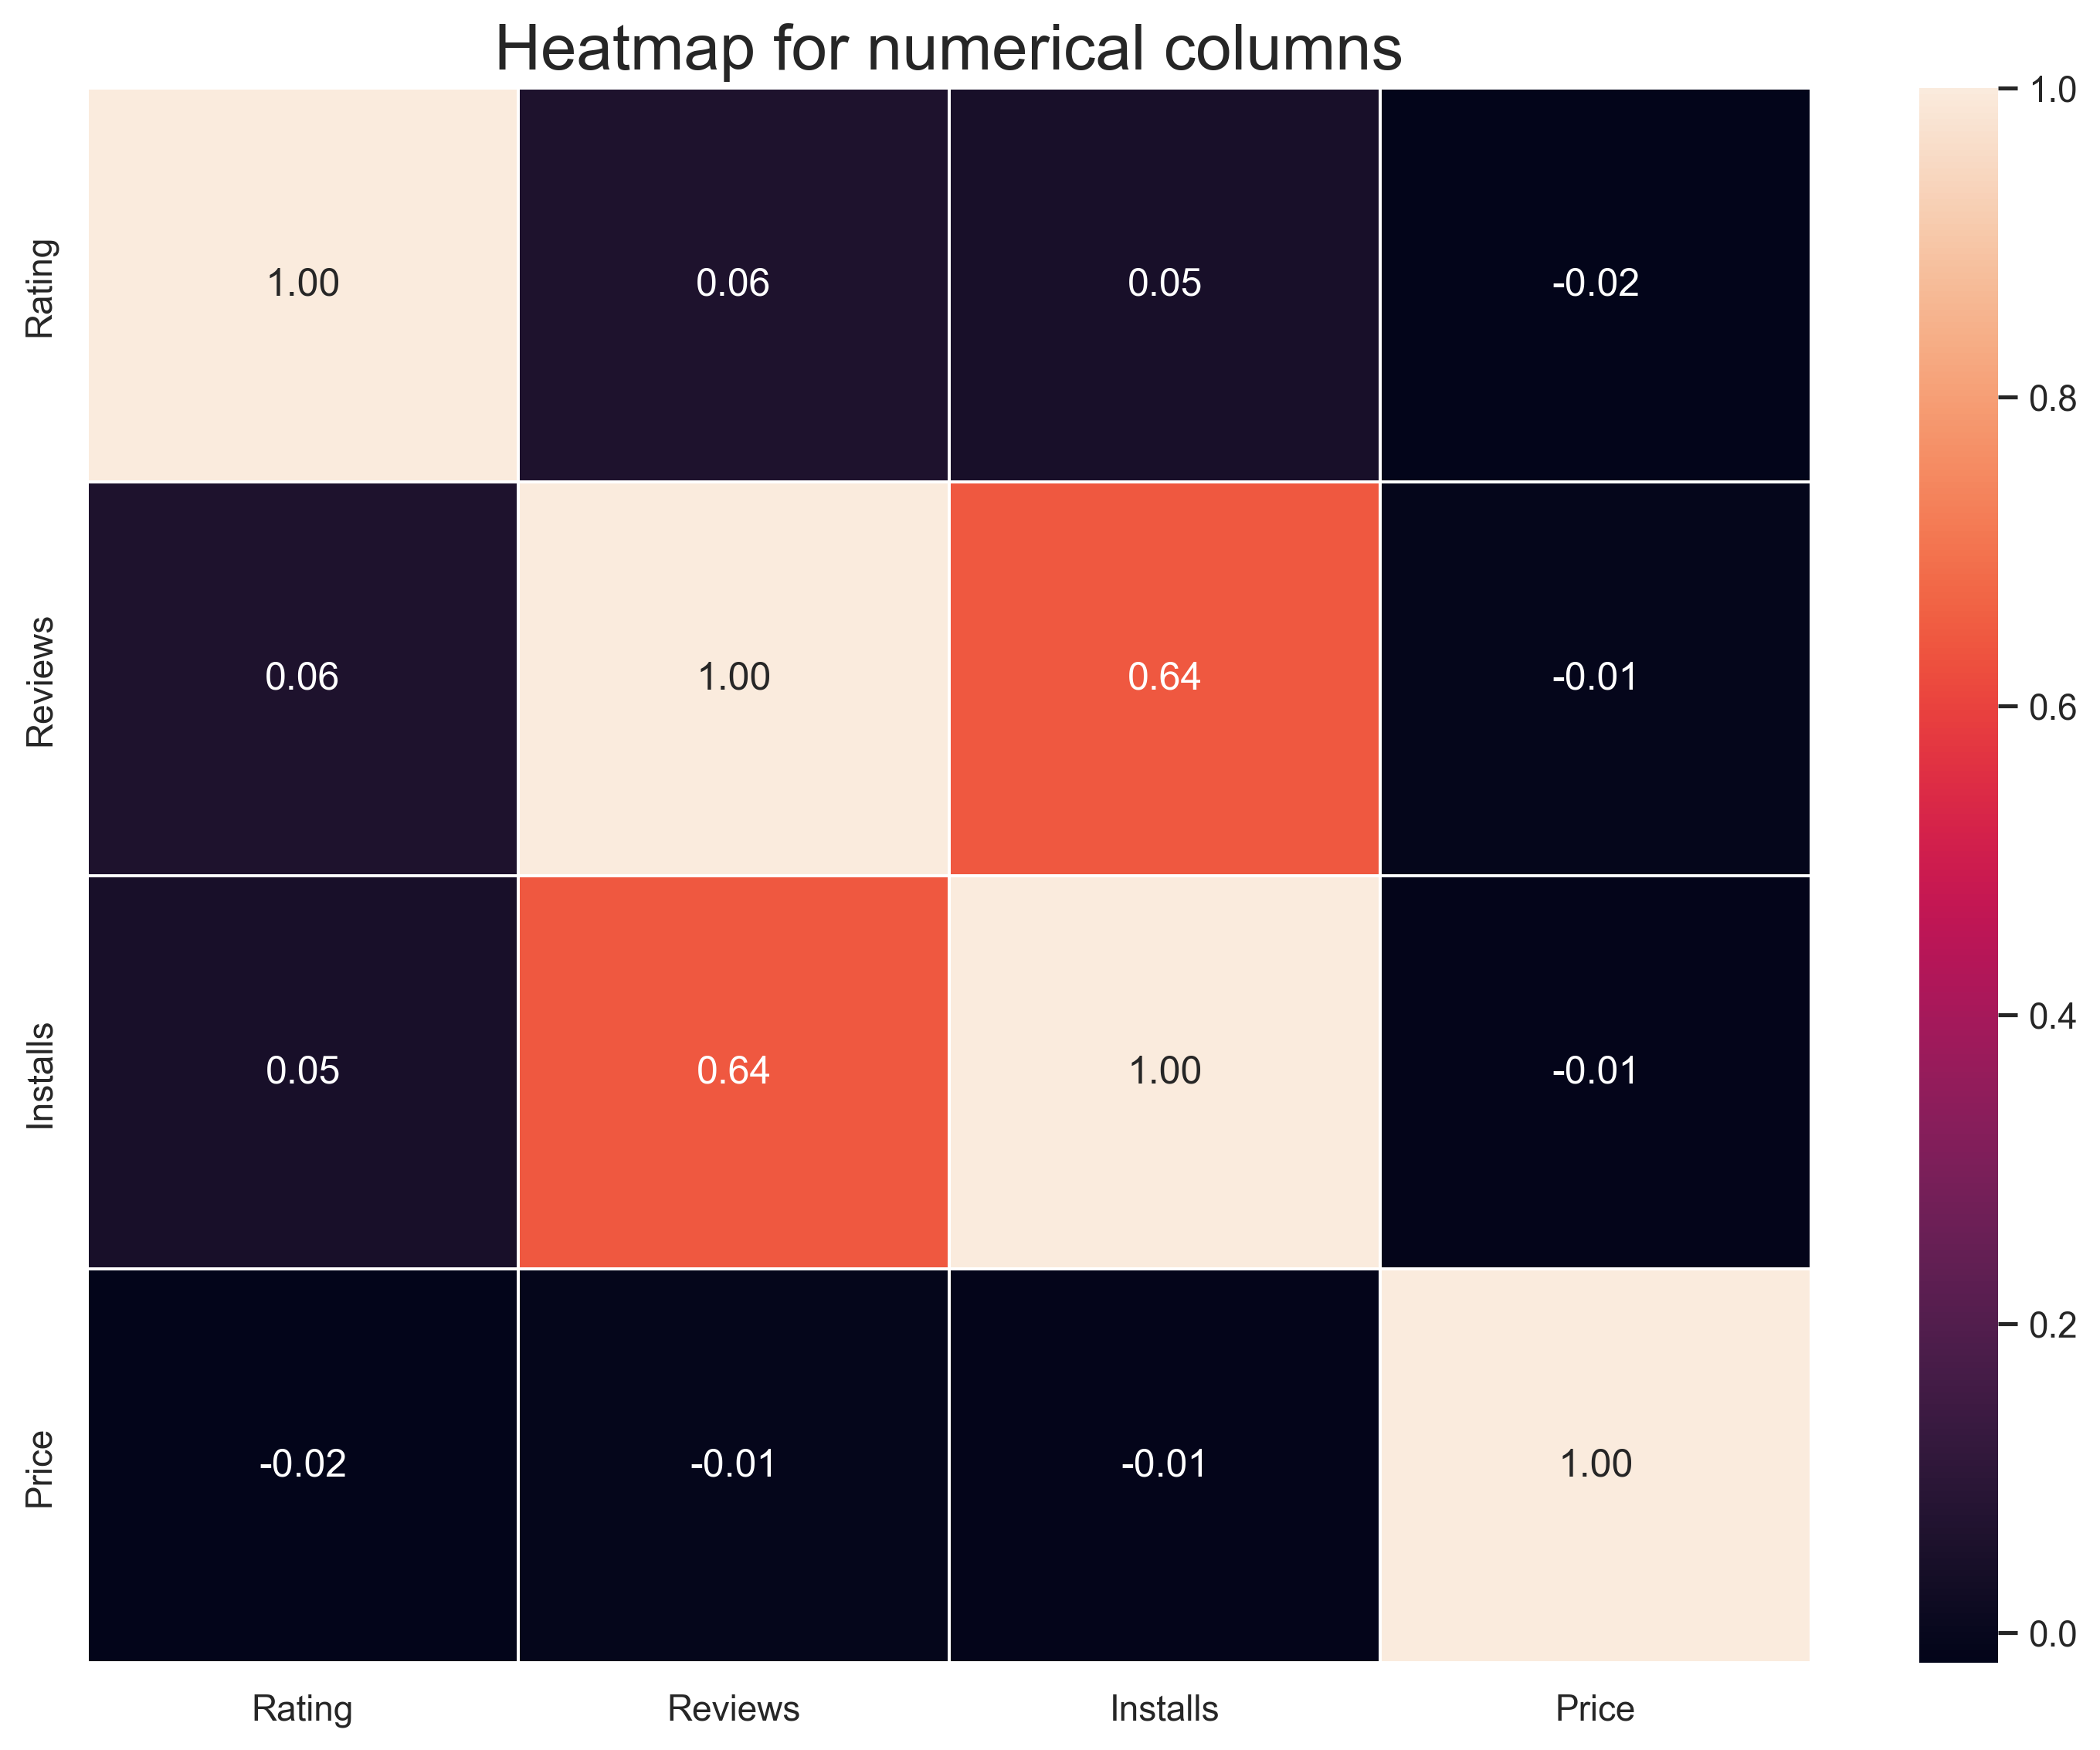

In [108]:
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt=".2f")
plt.title("Heatmap for numerical columns",size=20)

In [109]:
#The relationship between the Installs and Reviews columns is 0.64.
#Yüklemeler ve İncelemeler sütunları arasındaki ilişki 0,64'tür.

In [110]:
#Histogram with the kde for the rating column
#Derecelendirme sütunu için kde içeren histogram

Text(0.5, 1.0, 'Histogram with the kde for the rating column')

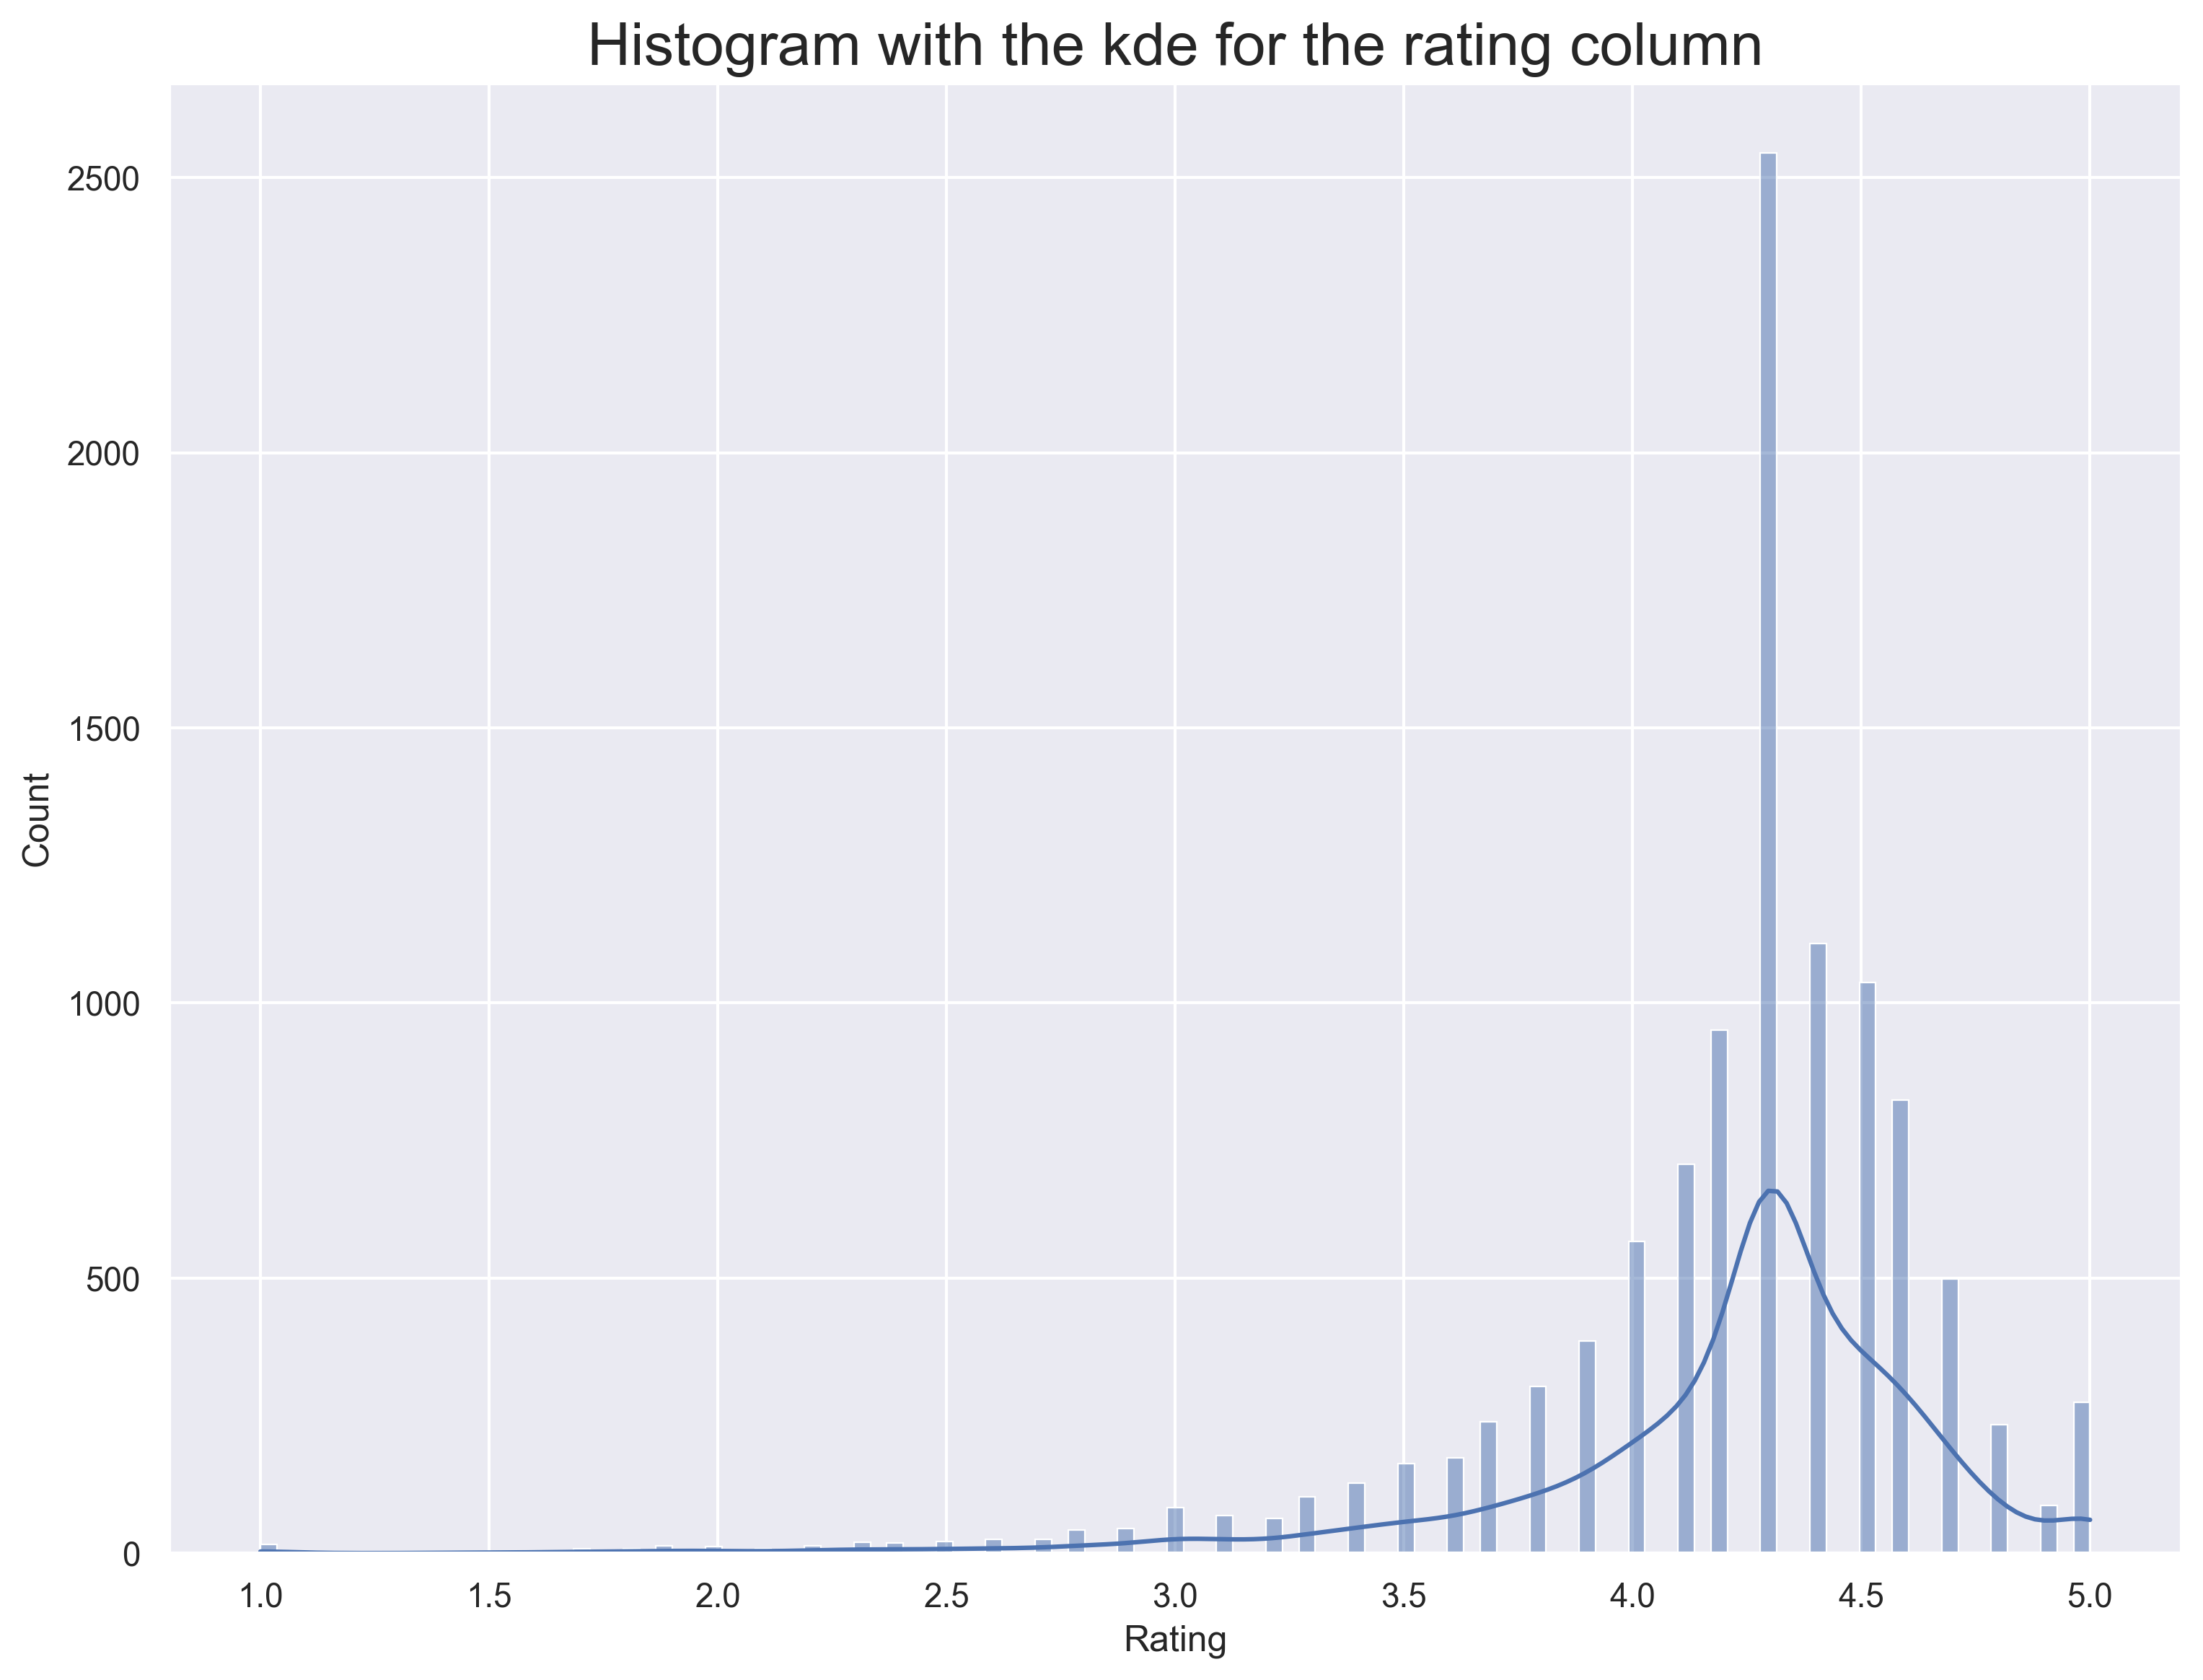

In [111]:
sns.histplot(data["Rating"],kde=True)
plt.title("Histogram with the kde for the rating column",size=20)

In [112]:
#As you can see, the most values are distributed around 4.3.
#Gördüğünüz gibi, çoğu değer 4.3 civarında dağıtılıyor.